In [1]:
import csv
import pandas as pd
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community 

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
subset_neg = 'Negative'
subset_pos = 'Positive'

In [3]:
nodes_df_neg = pd.read_csv('posts_subsets/NODES_prating_LIWC_neg.csv', low_memory=False)
edges_df_neg = pd.read_csv('posts_subsets/EDGES_Neg-comp_adjacent.csv', low_memory=False)
# subset_str_n  = 'negativo'
    
nodes_df_pos   = pd.read_csv('posts_subsets/NODES_prating_LIWC_pos.csv', low_memory=False)
edges_df_pos   = pd.read_csv('posts_subsets/EDGES_Positiva_adjacent.csv', low_memory=False)
# subset_str_p     = 'positivo'



In [4]:
def extract_communities(nodes_df, edges_df, subset, size_word=None ):
  #Create Network Graph
  G = nx.from_pandas_edgelist(edges_df, 'source', 'target', ['weight'])
  data = nodes_df.set_index('id').to_dict('index').items()
  print(nx.info(G)) # Print information about the Graph
  G.add_nodes_from(data)

  ############## Community Algorithm (I guess it's Louvain's algo )#####################

  communities = community.greedy_modularity_communities(G)
  modularity_dict = {} # Create a blank dictionary
  for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
      for name in c: # Loop through each word
          modularity_dict[name] = i 

  # Now you can add modularity information like we did the other metrics
  nx.set_node_attributes(G, modularity_dict, 'modularity')
  communities = sorted(communities, key=len, reverse=True)
  #Save new networkX Graph with modularity attribute
  nx.write_gpickle(G, str(subset)+'_communities_graph.gpickle')
  print(f"The graph has {len(communities)} communities.")

  ######### Extract Degree of each word in each community ##############

  nodes_class = [v.get('label') for n,v in G.nodes(data=True) if v['modularity'] == 0]  
  #Extract Degree Dictionary necessary for word cloud 
  degree_dict = dict(G.degree(G.nodes()))
  nx.set_node_attributes(G, degree_dict, 'degree')
  sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
  labels_dict   = nx.get_node_attributes(G,'label')

  ########## Create Word Cloud Dictionary ###############################
  # For each community we have dict --> Word: Degree
  #Appending labels to classes instead of IDs

  #size node by degree
  if size_word == 'degree':
    classes_dict = {}
    word_cloud_dict = {}
    for i,c in enumerate(communities):
          nodes_class = [( v.get('label'), v.get('degree') ) for n,v in G.nodes(data=True) if v['modularity'] == i ]  
          classes_dict[i] = nodes_class
          word_cloud_dict[i] = dict(classes_dict[i]) 

  #size node by problematic index
  elif size_word == 'problematic_index':
    classes_dict = {}
    word_cloud_dict = {}
    for i,c in enumerate(communities):
          nodes_class = [( v.get('label'), v.get('counts_problematico') ) for n,v in G.nodes(data=True) if v['modularity'] == i and v.get('counts_problematico') !=0]  
          classes_dict[i] = nodes_class
          word_cloud_dict[i] = dict(classes_dict[i]) 

  return word_cloud_dict

def get_community(word_dict, index):
  community = word_dict[index]
  return community

In [5]:
#Extract Right Parties community
word_cloud_pos = extract_communities(nodes_df_pos, edges_df_pos, subset_pos, size_word = 'degree')

Name: 
Type: Graph
Number of nodes: 12918
Number of edges: 67833
Average degree:  10.5021
The graph has 626 communities.


In [6]:
#Extract Left Parties communities
word_cloud_neg = extract_communities(nodes_df_neg, edges_df_neg, subset_neg, size_word = 'degree')

Name: 
Type: Graph
Number of nodes: 10984
Number of edges: 61856
Average degree:  11.2629
The graph has 471 communities.


In [7]:
#Plotting a selected community 
def plot_clusters(community):
  print('plot of the community...')
  wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white',  
                min_font_size = 10).generate_from_frequencies(community)
  plt.figure()
  plt.imshow(wordcloud,interpolation="bilinear")
  plt.axis("off")
  plt.show()

#### Pos Type of campaign

plot of the community...


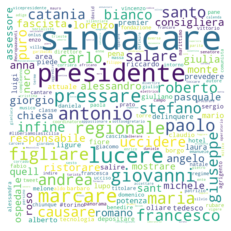

In [8]:
#getting 1st biggest community in the right parties
community_right = get_community(word_cloud_pos, 1) #change this index
plot_clusters(community_right)

plot of the community...


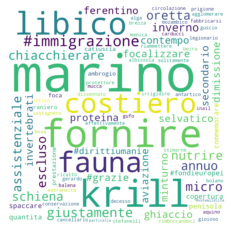

In [9]:
#getting 10th biggest community in the right parties
community_right = get_community(word_cloud_pos, 10) #change this index
plot_clusters(community_right)
#seems like the topic is terrorism, immigrants..

plot of the community...


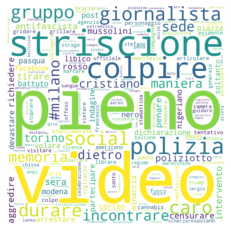

In [10]:
#getting 1st biggest community in the left parties
community_left = get_community(word_cloud_neg, 1) #change this index
plot_clusters(community_left)

plot of the community...


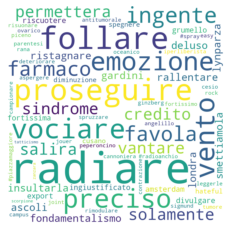

In [11]:
#getting 10th biggest community in teh left parties
community_left = get_community(word_cloud_neg, 10) #change this index
plot_clusters(community_left)

In [13]:
#Extract Right Parties communities
word_cloud_right_pos = extract_communities(nodes_df_pos, edges_df_pos, subset_pos, size_word='problematic_index')

Name: 
Type: Graph
Number of nodes: 12918
Number of edges: 67833
Average degree:  10.5021
The graph has 626 communities.


In [ ]:
community_right = get_community(word_cloud_right_pos, 2) #change this index
plot_clusters(community_right)

#### Gephi Import 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from operator import itemgetter
import  collections
from operator import itemgetter
import random
import os
import seaborn as sns

from IPython.display import clear_output


plt.rcParams['savefig.facecolor'] = 'white'

In [2]:
#create left graph
nodes_df_L = pd.read_csv('Gephi_Graphs/Neg_page_rank.csv', low_memory=False).drop('timeset', axis = 1).dropna()
edges_df_L = pd.read_csv('posts_subsets/EDGES_Neg-comp_adjacent.csv', low_memory=False)
# edges_df_L = pd.read_csv('subsets/EDGES_sinistra_adjacent.csv', low_memory=False)
subset_str_L  = 'LEFT'

G_L = nx.from_pandas_edgelist(edges_df_L, 'source', 'target', ['weight'])
data = nodes_df_L.set_index('Id').to_dict('index').items()
G_L.add_nodes_from(data)
nodes_df_L

,Id,Label,counts,counts_problematico,counts_positivo,counts_negativo,counts_ambiguo,polarity,emo_neg,ansia,rabbia,tristez,parolac,tot_neg,Degree,modularity_class,pageranks
0,0,musulmano,15.0,5.0,3.0,6.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,18,12,0.000143
1,1,pensare,113.0,7.0,54.0,52.0,0.0,0.467500,0.0,0.0,0.0,0.0,0.0,0.0,168,18,0.001110
2,2,portare,148.0,17.0,81.0,50.0,0.0,0.409666,0.0,0.0,0.0,0.0,0.0,0.0,206,9,0.001400
3,3,guerra,76.0,7.0,32.0,33.0,4.0,-0.409666,0.0,0.0,0.0,0.0,0.0,0.0,96,9,0.000706
4,4,santo,18.0,2.0,6.0,10.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,29,20,0.000238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10980,10981,quindicenne,1.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2,20,0.000025
10981,10982,#vigliacco,1.0,0.0,0.0,1.0,0.0,-0.915243,0.0,0.0,0.0,0.0,0.0,0.0,1,23,0.000019
10982,10983,indugiare,1.0,0.0,1.0,0.0,0.0,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,2,4,0.000027
10983,10984,brambilla,1.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1,4,0.000020


In [12]:
G_L

In [5]:
#create right graph
nodes_df_R = pd.read_csv('Gephi_Graphs/Pos_page_rank.csv', low_memory=False).drop('timeset', axis = 1).dropna()
edges_df_R = pd.read_csv('posts_subsets/EDGES_Positiva_adjacent.csv', low_memory=False)
subset_str_R  = 'RIGHT'

G_R = nx.from_pandas_edgelist(edges_df_R, 'source', 'target', ['weight'])
data = nodes_df_R.set_index('Id').to_dict('index').items()
G_R.add_nodes_from(data)

nodes_df_R

,Id,Label,counts,counts_problematico,counts_positivo,counts_negativo,counts_ambiguo,polarity,emo_neg,ansia,rabbia,tristez,parolac,tot_neg,Degree,modularity_class,pageranks
0,0,collegamento,52,0,51,1,0,0.251332,0,0,0,0,0,0,57,56,0.000348
1,1,continuo,66,0,61,5,0,-0.873098,0,0,0,0,0,0,89,0,0.000516
2,2,tempo,167,1,153,13,0,1.000000,0,0,0,0,0,0,231,6,0.001419
3,3,pastorello,1,0,1,0,0,0.000000,0,0,0,0,0,0,2,0,0.000022
4,4,recuperare,12,0,12,0,0,-1.000000,0,0,0,0,0,0,21,0,0.000140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12942,12942,#ricorso,1,0,1,0,0,-0.452810,0,0,0,0,0,0,2,8,0.000022
12943,12943,xadiscussione,1,0,1,0,0,0.251332,0,0,0,0,0,0,2,10,0.000025
12944,12944,xadibattito,2,0,2,0,0,1.000000,0,0,0,0,0,0,4,10,0.000047
12945,12945,xaregole,1,0,1,0,0,0.000000,0,0,0,0,0,0,2,10,0.000024


In [6]:
def GetKey(val, dictionary):
    for key, value in dictionary.items():
        if val == value:
            return key
    return -1

def Get_Keys(val, dictionary):
    keys_list = []
    for key, value in dictionary.items():
        if val == value:
            keys_list.append(key)
    
    return keys_list
    

def get_index_modularity_word(word, graph):
    mod_class   = nx.get_node_attributes(graph, 'modularity_class')
    labels_dict = nx.get_node_attributes(graph,'Label')
        
    node_id = GetKey( str(word), labels_dict)
    
    return mod_class.get(node_id)

def get_cluster_given_word(word, graph):
    
    sub_G = graph.copy()
    
    id_modularity = get_index_modularity_word(word, graph)
    mod_class     = nx.get_node_attributes(graph, 'modularity_class')
    list_nodes    = Get_Keys(id_modularity, mod_class)
    sub_G = graph.subgraph(list_nodes)
    
    return sub_G

def get_print_num_pagerank(num, graph):
    pagerank_dict = nx.pagerank(graph, alpha=0.9)
    
    labels_dict = nx.get_node_attributes(graph,'Label')
    nx.set_node_attributes(graph, pagerank_dict, 'pagerank')
    
    sorted_pagerank = sorted(pagerank_dict.items(), key=itemgetter(1), reverse=True)
    print("Top ",num," nodes by pagerank:")
    for b in sorted_pagerank[:num]:
        print(b, labels_dict.get(b[0]))
        
    return 

def get_print_num_attribute(num, attribute, graph):
    
    attr_dict = nx.get_node_attributes(graph, attribute)
    labels_dict = nx.get_node_attributes(graph,'Label')
    nx.set_node_attributes(graph, attr_dict, attribute)
    
    sorted_att = sorted(attr_dict.items(), key=itemgetter(1), reverse=True)
    print("\nTop ",num," nodes by ", attribute,":")
    for b in sorted_att[:num]:
        print(b, labels_dict.get(b[0]))
    
    mean_attr = sum(np.array(list(attr_dict.values())))
    print("\nTotal", attribute, " of the cluster is:", mean_attr)
    
    mean_attr = np.array(list(attr_dict.values())).mean()
    print("\nAverage", attribute, " of the cluster is:", mean_attr)
    
    return

def average_clusters_attributes(attribute, graph):
    
    clusters = nx.get_node_attributes(graph,'modularity_class')
    list_clusters = list(set(clusters.values()))
    
    dict_cluster_average_attribute = {}
    
    
    for i, cluster in enumerate(list_clusters):
        clear_output(wait=True)
        print("Cluster", i + 1 , "/", len(list_clusters))
        
        temp_sub_graph = graph.copy()
        mod_class     = nx.get_node_attributes(graph, 'modularity_class')
        list_nodes    = Get_Keys(cluster, mod_class)
        
        temp_G = graph.subgraph(list_nodes)
        attr_dict = nx.get_node_attributes(temp_G, attribute)
        mean_attr = np.array(list(attr_dict.values())).mean()
        
        dict_cluster_average_attribute.update({cluster:mean_attr})
#         if i == 50:
#             break
    
    return dict_cluster_average_attribute

def statistics_average_attribute_cluster(cluster_index, dict_id_average_att):
    
    tot_values = len(dict_id_average_att)
    value      = dict_id_average_att.get(cluster_index)
    #cast the values of the dictionari id:average_attributes to an array
    arr        = np.array(list(dict_id_average_att.values()))
    #how many values are above a given value
    tot_above_mask = arr > value
    
    tot_above = sum(tot_above_mask)
    
    print("Cluster", cluster_index, "is in the top:", 1.-tot_above/tot_values)
    
    return

def get_words_of_cluster(cluster_id, graph):
    
    labels_dict = nx.get_node_attributes(graph,'Label')    
    mod_class   = nx.get_node_attributes(graph, 'modularity_class')
    list_nodes  = Get_Keys(cluster_id, mod_class)
    
    lab_list = []
    
    for b in list_nodes:
        lab_list.append(labels_dict.get(b))
    
    temp_G = graph.subgraph(list_nodes)
    get_print_num_pagerank(15, temp_G)
    get_print_num_attribute(15, 'counts_problematico', temp_G)
    
    return lab_list

#### Left clandestino cluster

In [28]:
sub_G_L = get_cluster_given_word('clandestino', G_L)
print(nx.info(sub_G_L), "\n")

######## PageRank score for the cluster
get_print_num_pagerank(10, sub_G_L)

######## Average hate_index score for the cluster
get_print_num_attribute(10, 'counts_problematico', sub_G_L)

Name: 
Type: Graph
Number of nodes: 812
Number of edges: 1182
Average degree:   2.9113 

Top  10  nodes by pagerank:
(97, 0.031613018252501936) sinistro
(318, 0.01818202871326308) centro
(319, 0.018095276168804294) sociale
(13, 0.016276810186296016) immigrazione
(151, 0.014744413019500701) clandestino
(1787, 0.012836970464757192) destro
(944, 0.01057786526015092) accoglienza
(116, 0.010153998670902114) delinquere
(187, 0.009269172654988092) sentire
(1828, 0.007705230827683029) centrare

Top  10  nodes by  counts_problematico :
(97, 46.0) sinistro
(151, 42.0) clandestino
(13, 31.0) immigrazione
(318, 31.0) centro
(319, 29.0) sociale
(944, 25.0) accoglienza
(742, 23.0) immigrato
(116, 20.0) delinquere
(1166, 19.0) business
(101, 18.0) straniero

Total counts_problematico  of the cluster is: 704.0

Average counts_problematico  of the cluster is: 0.8669950738916257


In [16]:
dic_GL_att = average_clusters_attributes('counts_problematico', G_L)
clust_id   = get_index_modularity_word('clandestino', G_L)
statistics_average_attribute_cluster(clust_id, dic_GL_att)

Cluster 28 / 28
Cluster 4 is in the top: 0.9285714285714286


In [17]:
sorted_clust_average = sorted(dic_GL_att.items(), key=itemgetter(1), reverse=True)
sorted_clust_average[:20]
# get_words_of_cluster(clust_id, G_L)

[(13, 2.1123595505617976),
 (12, 0.9699842022116903),
 (4, 0.8669950738916257),
 (7, 0.7175572519083969),
 (11, 0.6695906432748538),
 (8, 0.664),
 (19, 0.6496815286624203),
 (0, 0.5772727272727273),
 (5, 0.5746445497630331),
 (22, 0.5625),
 (6, 0.5595959595959596),
 (9, 0.5325779036827195),
 (2, 0.457286432160804),
 (24, 0.44542772861356933),
 (1, 0.4406779661016949),
 (16, 0.3825136612021858),
 (3, 0.37566137566137564),
 (15, 0.33513513513513515),
 (14, 0.33114754098360655),
 (21, 0.3191489361702128)]

In [18]:
sorted_clust_average[1]


(12, 0.9699842022116903)

In [19]:
sorted_clust_average[1]


(12, 0.9699842022116903)

In [20]:
##aSSORTATIVITY WRT PROBLEMATICO 

nx.attribute_assortativity_coefficient(G_L, 'counts_problematico')

0.024216922742980956

### right Clandestino

In [21]:
sub_G_R = get_cluster_given_word('clandestino', G_R)
print(nx.info(sub_G_R), "\n")

######## PageRank score for the cluster
get_print_num_pagerank(10, sub_G_R)

######## Average hate_index score for the cluster
get_print_num_attribute(10, 'counts_problematico', sub_G_R)

Name: 
Type: Graph
Number of nodes: 2055
Number of edges: 8354
Average degree:   8.1304 

Top  10  nodes by pagerank:
(285, 0.01792267527452192) lavorare
(282, 0.012208610812072439) italiano
(104, 0.011243480749972796) persona
(712, 0.008688062036398898) paese
(1527, 0.007520526780150601) diritto
(208, 0.007063790306254089) vita
(470, 0.007000385009214011) piccolo
(1038, 0.006514656113292076) cittadino
(3471, 0.006205652480296223) tutelare
(672, 0.005918031165848709) leggere

Top  10  nodes by  counts_problematico :
(282, 11) italiano
(4264, 11) immigrazione
(4256, 8) clandestino
(3295, 7) confino
(780, 6) sicurezza
(480, 5) islamico
(4806, 5) sbarco
(5139, 5) ungheria
(338, 4) morto
(695, 4) galera

Total counts_problematico  of the cluster is: 259

Average counts_problematico  of the cluster is: 0.12603406326034064


In [22]:
dic_GR_att = average_clusters_attributes('counts_problematico', G_R)
clust_id   = get_index_modularity_word('clandestino', G_R)
statistics_average_attribute_cluster(clust_id, dic_GR_att)

Cluster 79 / 79
Cluster 0 is in the top: 0.9873417721518988


In [23]:
sorted_clust_average = sorted(dic_GR_att.items(), key=itemgetter(1), reverse=True)
sorted_clust_average[:20]

[(44, 1.0),
 (0, 0.12603406326034064),
 (62, 0.10050251256281408),
 (6, 0.08766233766233766),
 (10, 0.04290091930541369),
 (18, 0.03608247422680412),
 (11, 0.03333333333333333),
 (21, 0.027114967462039046),
 (20, 0.025),
 (56, 0.024412296564195298),
 (12, 0.021406727828746176),
 (3, 0.020887728459530026),
 (8, 0.018558172733761598),
 (22, 0.0165016501650165),
 (17, 0.011811023622047244),
 (13, 0.00847457627118644),
 (14, 0.007462686567164179),
 (1, 0.0),
 (2, 0.0),
 (4, 0.0)]

In [24]:
# max_id = sorted_clust_average[0][0]
get_words_of_cluster(10, G_R)


Top  15  nodes by pagerank:
(88, 0.020918018279361017) giorno
(318, 0.012261853109882802) vittima
(106, 0.011177609579293202) cuore
(266, 0.009742772846262711) notre
(369, 0.009472182101878716) dama
(562, 0.008334790127196786) luogo
(1416, 0.007895819112242278) pieno
(136, 0.007328790574891734) colpire
(1739, 0.00689381789343389) mafia
(135, 0.00686016733804831) cristiano
(392, 0.00640646942825065) odiare
(5653, 0.006317577063755681) #siamolitalia
(892, 0.006237603219948835) rischiare
(54, 0.006029356389458592) chiesa
(210, 0.005315837482648739) restare

Top  15  nodes by  counts_problematico :
(4131, 3) #portichiusi
(135, 3) cristiano
(336, 3) terrorista
(4130, 2) chiuso
(2094, 2) chiacchiera
(4825, 2) barcone
(4878, 2) isis
(2909, 2) terrorismo
(5127, 2) razzismo
(5205, 2) azzerare
(3482, 2) carcere
(54, 1) chiesa
(72, 1) solo
(4303, 1) triplicare
(4302, 1) musulmano

Total counts_problematico  of the cluster is: 42

Average counts_problematico  of the cluster is: 0.04290091930541369

['#pasqua',
 'persecuzione',
 'rischiare',
 'praxis',
 'davanti',
 'cuore',
 'giorno',
 'proteggerla',
 'pieno',
 'restare',
 'discriminazione',
 'gang',
 'luogo',
 'puro',
 'carcere',
 'possesso',
 'odiare',
 'denunciare',
 'massa',
 'ennesimo',
 'vicenda',
 'essere',
 'parigi',
 'massacrare',
 'spiritualita',
 'contenuto',
 'preghiera',
 'giornalino',
 'scomparso',
 'scattare',
 'chiuso',
 'esploso',
 'episodio',
 'magia',
 'millenario',
 'pablo',
 'cattedrale',
 'estremo',
 'incendiare',
 'notre',
 'colpire',
 'guglia',
 'maestoso',
 'divampare',
 'strutturare',
 'ostruzionismo',
 'sangue',
 'uovo',
 'armare',
 'sodare',
 'attacco',
 'lanka',
 'fedele',
 'terrorista',
 'manifestare',
 'decina',
 'perseguitato',
 'pregare',
 'giovanna',
 'impegniamoci',
 'dickinson',
 'complice',
 'soffrire',
 'ucciso',
 '#srilanka',
 'genocidio',
 'vittima',
 'cristianofobia',
 'creatura',
 'associarlo',
 'fatelo',
 'mazzata',
 '#capaci',
 'conflitto',
 'pezzo',
 'bilaterale',
 'scolpito',
 'sacrosa

In [25]:
# Check connectivity
for G, label in [(G_L, 'lEFT'), (G_R, 'RIGHT')]:
    print(f"Network {label} is connected: \t", nx.is_connected(G))


Network lEFT is connected: 	 False
Network RIGHT is connected: 	 False


In [26]:
# Number of connected components and sizes
CC={}
for G, label in [(G_L, 'lEFT'), (G_R, 'RIGHT')]:
    CC[label] = sorted(nx.connected_components(G), key=len, reverse=True)
    print(f"Network {label} connected components: \t", len(CC[label]))
    print(f"Network {label} larger component: \t", len(CC[label][0]), '\t Ratio:', round(len(CC[label][0])/len(G),4))
    print(f"Network {label} second component: \t", len(CC[label][1]))
    print('\n')

Network lEFT connected components: 	 3
Network lEFT larger component: 	 10984 	 Ratio: 0.9998
Network lEFT second component: 	 1


Network RIGHT connected components: 	 37
Network RIGHT larger component: 	 12903 	 Ratio: 0.9966
Network RIGHT second component: 	 3




In [27]:
#  First, 2nd, 3rd order moment

def nth_moment(G,n):
    degree_np = np.array(list(dict(G.degree).values()))
    return (sum(degree_np**n)/len(G))

for G, label in [(G_L, 'lEFT'), (G_R, 'RIGHT')]:
    print(f"Network {label} average degree : \t", round(nth_moment(G,1),2))
    print(f"Network {label} 2nd order moment: \t", round(nth_moment(G,2),2))
    print(f"Network {label} 3rd order moment: \t", round(nth_moment(G,3),2))
    print('\n')

Network lEFT average degree : 	 11.26
Network lEFT 2nd order moment: 	 1045.92
Network lEFT 3rd order moment: 	 304540.22


Network RIGHT average degree : 	 10.48
Network RIGHT 2nd order moment: 	 1019.79
Network RIGHT 3rd order moment: 	 304555.95


